<a href="https://colab.research.google.com/github/Er-Yash/Online-Shopping-Intention-Analysis/blob/main/Online_Shopping_Intention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
data=pd.read_csv('online_shoppers_intention.csv')

In [26]:
missing=data.isnull().sum()
print(missing)


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [27]:
# data.fillna(0, inplace = True)

# no need to reun querry

In [28]:
x=data.iloc[:,[5,6]].values
x.shape

(12330, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

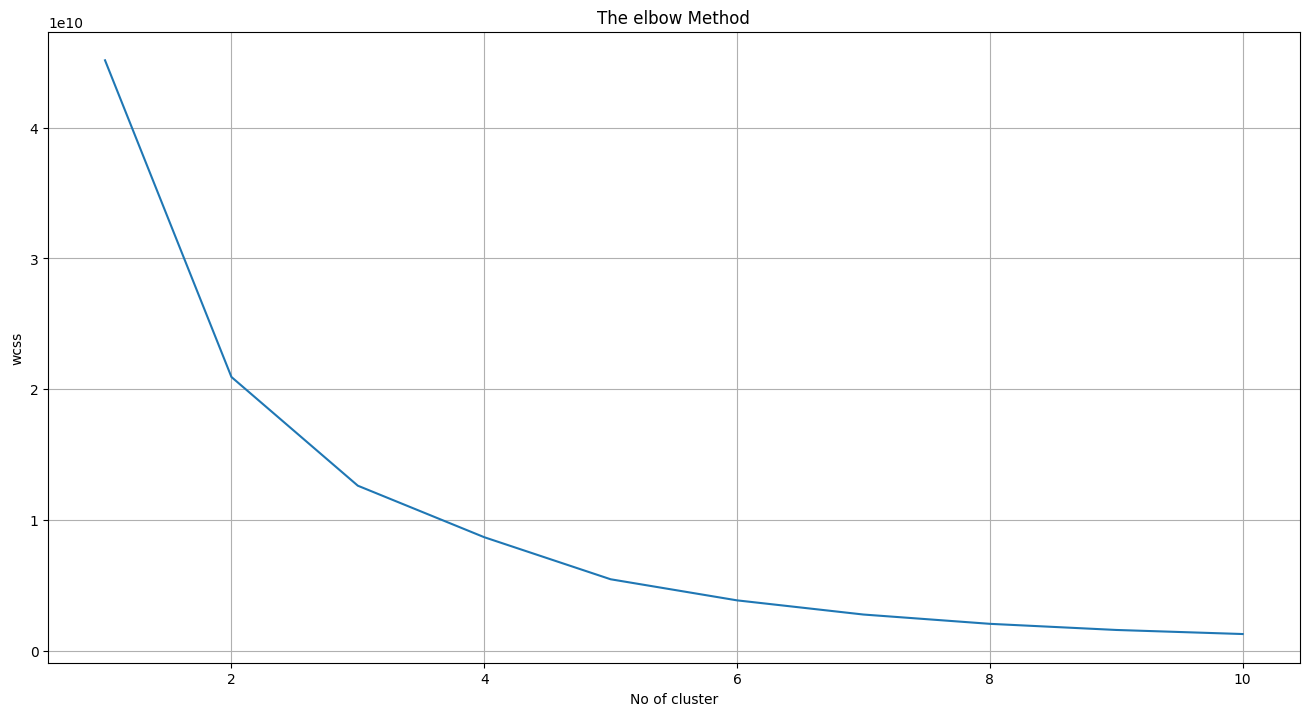

In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,
            init='k-means++',
            max_iter=300,
            n_init=10,
            random_state=0,
            tol=0.001,
            algorithm='full'
            )
  km.fit(x)
  labels=km.labels_
  wcss.append(km.inertia_)
plt.rcParams['figure.figsize']=(13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('The elbow Method')
plt.xlabel('No of cluster')
plt.ylabel('wcss')
plt.show()

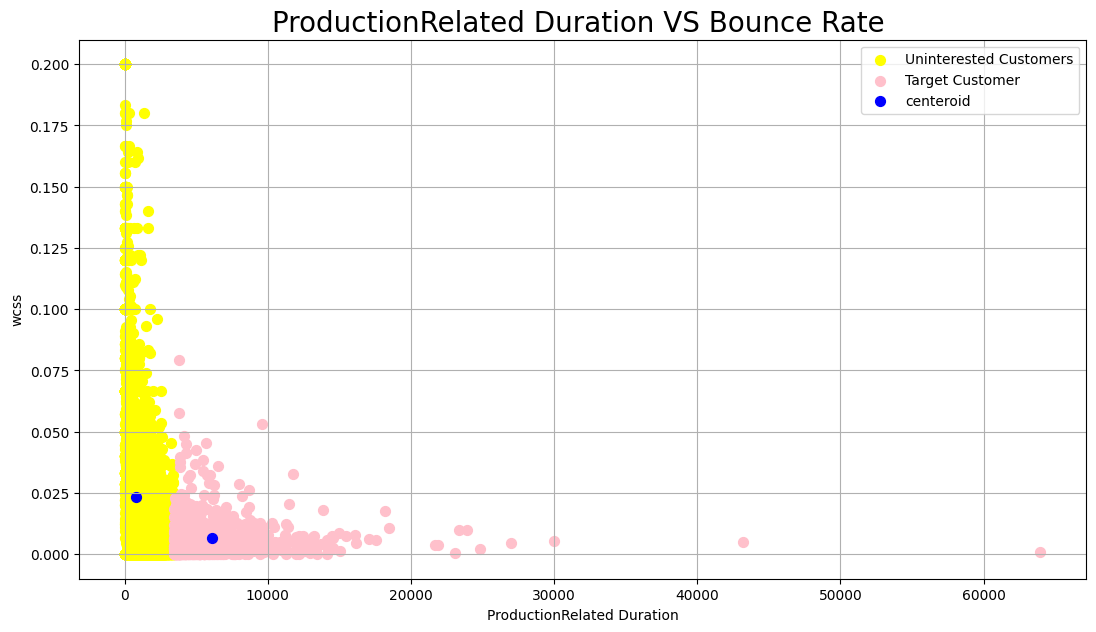

In [42]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label='Uninterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target Customer')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title("ProductionRelated Duration VS Bounce Rate ",fontsize=20)
plt.grid()
plt.xlabel("ProductionRelated Duration")
plt.ylabel("wcss")
plt.legend()


In [52]:
!pip install scikit-plot

Adjust rand index:
0.08359442469281096


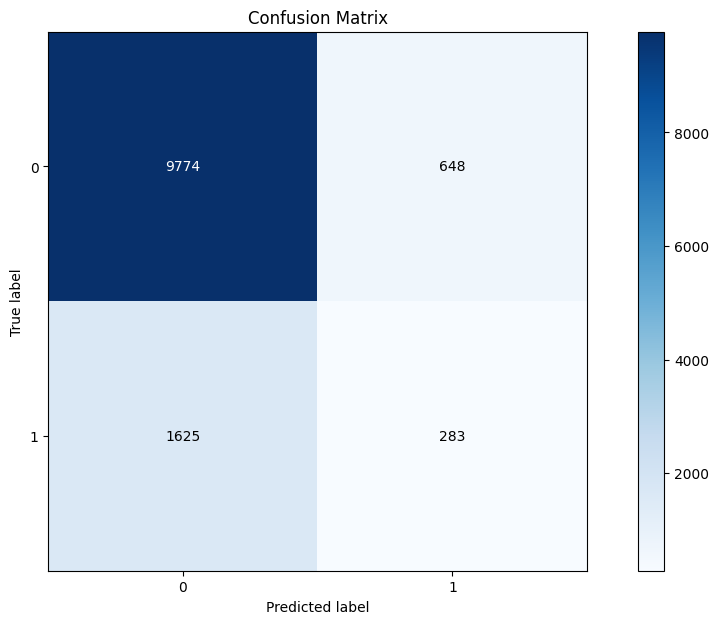

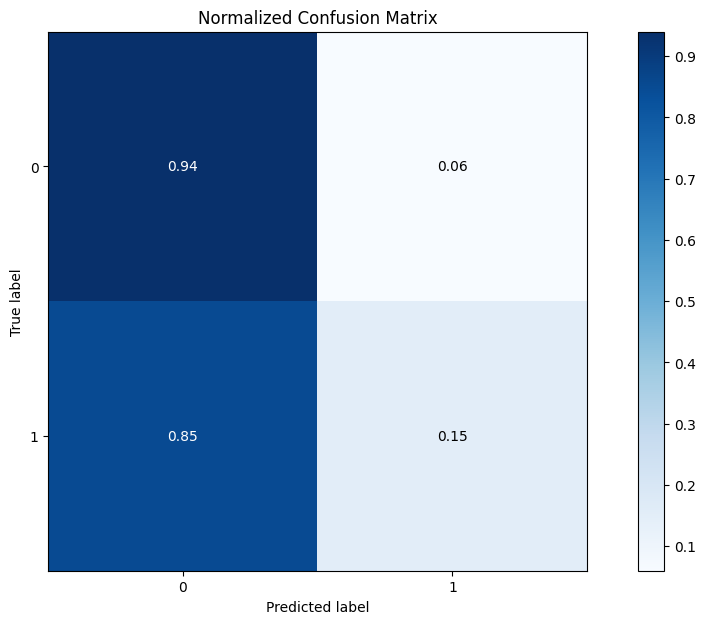

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels_true=le.fit_transform(data['Revenue'])
labels_pred = y_means
from sklearn import metrics
score=metrics.adjusted_rand_score(labels_true,labels_pred)
print("Adjust rand index:")
print(score)
# print confusion matrix
#cm = metrics.plot_confusion_matrix(None, labels_true, labels_pred)
#print(cm)import scikitplot as skplt
# !pip install scikitplot
import scikitplot as skplt

plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt2=skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=True)


In [42]:
#From the confusion matrix, we can see that out of 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%.
#  However, out of 937 successful incomes, only 284 are grouped as target customers or 15%.
# Also, the adjusted index score is not very high.